# Logistic Regression

In this lab, we will look at another classification algorithm, namely Logistic Regression.  We look at how we can motivate classification from the linear regression setting, formulate the problem as a Maximum Likelihood Estimation.  We then learn how to use sklearn for Logistic Regression, one hot encoding, and regularization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

#### From Linear Regression to Logistic Regression

Consider a simple one-dimensional example to predict value of $y$ based on feature $x$, where $y \in \{-1,+1\}$, and $x \in \mathbb{R}$.

In [2]:
data = pd.read_csv("data_log_reg.csv")
X = pd.DataFrame(data.x)
y = pd.DataFrame(data.y)

In [3]:
X.head()

,x
0,-2.000000
1,-1.890089
2,-1.801019
3,-1.622105
4,-1.278516


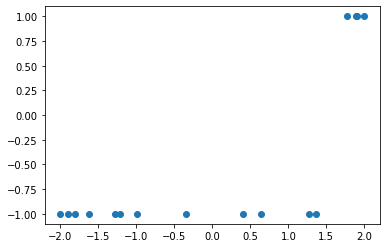

In [4]:
plt.scatter(X,y)

[-1]
[1]


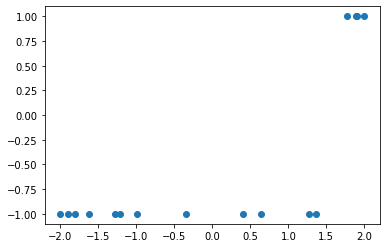

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv("data_log_reg.csv")

X = data[["x"]]
y = data.y

plt.scatter(X,y)

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X, y)

clf = GaussianNB()
clf.fit(X, y)

print(clf.predict(pd.DataFrame([1.6])))
print(log_reg.predict(pd.DataFrame([1.6])))

We have so far learnt two approaches to do this. <br>

The first is the Gaussian Naive Bayes model.  In this model, whenever we are given a new instance $x$, we calculate the quantity $P(y=1|x)$ and $P(y=-1|x)$, and returns the class where the probability is higher.  As an intermediate step that we need to calculate the joint probability of $P(y,x)$.  Note that it is *naive* in the sense that there is a conditional independence among the features

The second approach is Support Vector Machine.  In this model, we draw a *decision boundary* and then whenever we are given a new instance $x$ we check on which side of the boundary this $x$ lies, and then determine the class.  Note in SVM we do not tie any probability values at all.  The output from the decision function only gives us the class but we cannot discuss any probability  

Our third approach Logistic Regression draws a decision boundary directly on $P(y|x)$.  Note that this gives us a probability interpretation.  Furthermore, there is no implicity assumption in independence among the features.  Both of these make Logistic Regression a popular starting point for classification problem

For a start, lets try a linear regression on the data points above.

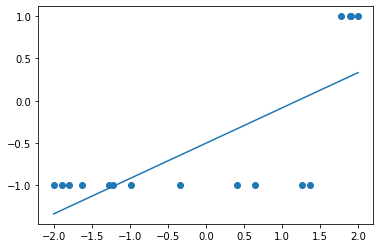

In [6]:
linear_reg = LinearRegression()
linear_reg.fit(X,y)

w = linear_reg.coef_[0]
b = linear_reg.intercept_

xs = np.array([-2,2])
ys = w*xs + b
plt.plot(xs, ys)

plt.scatter(X,y)

First, notice that it does not fit well.  Secondly, and more importantly, the predicted values are continuous over all possible values, i.e. any value is possible.  This is not helpful since we are seeking a *probability* function which means the predicted values $y$ must *squeeze* between $0$ and $1$.  This is where the logistic function comes into place.  The function maps any real value to one which is in range $(0,1)$.  This is how it looks like

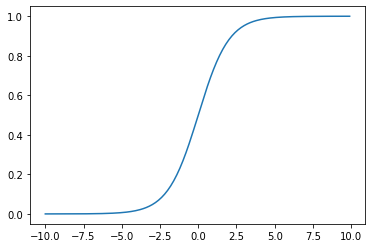

In [7]:
xs = np.arange(-10,10,0.1)
ys = 1/(1+np.exp(-1.*xs))
plt.plot(xs, ys)

#### Formulating Logistic Regression

In other words, in Logistic Regression we are interested in function $Pr(y=1|x)$.  In one-dimension, it takes the form

$$
Pr(y=1 | x) = \frac{1}{1+e^{-(wx+b)}} \tag{1}
$$

$$
Pr(y=-1 | x) = \frac{1}{1+e^{(wx+b)}} \tag{2}
$$

where $w$ and $b$ are values we will estimate via our training data.

Say we have the following three samples

$$
x_1 = 0.8, y_1=1 \\
x_2 = -1.0, y_2=-1 \\
x_3 = 1.2, y_3=1
$$

What is the probability you get the $y$ given $x$?  This is called the likelihood and is given by

$$
\mathscr{L} = Pr(y=1|x_1=0.8) \times Pr(y=-1|x_2=-1) \times Pr(y=1|x_3=1.2)
$$

Assuming the functional form (1), we then can express likelihood

$$
\mathscr{L} = \frac{1}{1+e^{-(0.8w+b)}} \frac{1}{1+e^{(-w+b)}} \frac{1}{1+e^{-(1.2w+b)}} \tag{3}
$$

Note here in the second term we have to calculate $Pr(y=-1|x)$ and this is given by

$$
Pr(y=-1 | x) = 1 -\frac{1}{1+e^{-(wx+b)}} = \frac{e^{-(wx+b)}}{1+e^{-(wx+b)}} = \frac{1}{1+e^{(wx+b)}}
$$

Taking log of (3), we have 

$$
\ln \mathscr{L} = \ln \frac{1}{1+e^{-(0.8w+b)}} + \ln \frac{1}{1+e^{(-w+b)}} + \ln \frac{1}{1+e^{-(1.2w+b)}}
$$

Our objective is to find the values of $w$ and $b$ that give rise to the maximum log-likelihood,  $\ln \mathscr{L}$.  Or equivalently we want to solve the following minimization problem

$$
\min_{w,b} \ln (1+e^{-(0.8w+b)}) \ln (1+e^{(-w+b)}) \ln (1+e^{-(1.2w+b)}) 
$$

There is no exact solution to this problem.  However as it is a convex function, one can solve it numerically using Gradient Descent. <br>

To generalize and summarize, in Logistic Regression, what we want is to find is the probability of a class, either $+1$ or $-1$ given the feature vector $\vec{x}$, i.e.

$$
Pr(y|\vec{x}) = \frac{1}{1+e^{-y(\vec{w}^\top \vec{x})}}
$$

To find the maximum likelihood estimator $\vec{w}$, we solve the following

$$
\min_{\vec{w}} \sum_{i=1}^{n} \ln ( 1+\exp  ( -y_i\vec{w}^\top \vec{x_i} ))
$$

#### Using sklearn for Logistic Regression

We use the iris dataset to demonstrate the use of sklearn.  Note however in this case we have a multi-class classification problem

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv("iris.csv")

X = data.drop(columns=["variety"])
y = data.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
round(accuracy_score(y_pred, y_test), 5)

0.96667

#### Exercse 1: One hot encoding <br>

In this exercise you will predict the whether a person earns >50k or <=50k using census data.  You will read the *census.csv* data build a Logistic Regression model out of it.  Note that in some columns you only have categorical values.  You will first need to create dummy variables out of the categories

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


# Convert the sample data into a DataFrame
df = pd.read_csv("census.csv")

# Convert categorical variables into dummy/indicator variables
df_dummies = pd.get_dummies(df, drop_first=True)

print (df_dummies)

# Split the data into features (X) and target (y)
X = df_dummies.drop('Target_y_ >50K', axis=1)
y = df_dummies['Target_y_ >50K']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print (f"\naccuracy:\n{accuracy}")
print (f"\nreport:\n{report}")

       age  sex_ Male  Target_y_ >50K
0       39          1               0
1       50          1               0
2       38          1               0
3       53          1               0
4       37          0               0
...    ...        ...             ...
27506   27          0               0
27507   40          1               1
27508   58          0               0
27509   22          1               0
27510   52          0               1

[27511 rows x 3 columns]

accuracy:
0.730147192440487

report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      4111
           1       0.34      0.07      0.12      1392

    accuracy                           0.73      5503
   macro avg       0.55      0.51      0.48      5503
weighted avg       0.65      0.73      0.66      5503



#### Exercse 2: Regularization <br>

In this exercise you will continue from Exercise 1 by trying different values for $C$ and norm.  The norm should be either "l1" or "l2".  Report the best combination

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV

# Define the parameter grid: C values and penalty types
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize a Logistic Regression model
# Note: 'liblinear' solver is used as it supports both l1 and l2 penalties
model = LogisticRegression(solver='liblinear')

# Initialize the GridSearchCV object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform the grid search over the training data
grid_search.fit(X_train, y_train)

# Extract the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print (f"best_params: {best_params}")
print (f"best_score: {best_score}")


best_params: {'C': 0.01, 'penalty': 'l2'}
best_score: 0.7423663677279574
